In [41]:
import tensorflow as tf

from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Creiamo dei dati sintetici seguendo la formula [ y = cos(2x_1) + cos(3x_2) ]
N = 1000
x = np.random.random((N, 2)) * 6 - 3 # Stiamo creando un vettore Nx2 di numeri casuali distribuiti uniformemente tra +3 e -3

In [4]:
y = np.cos(x[:,0]*2) + np.cos(x[:,1]*3)

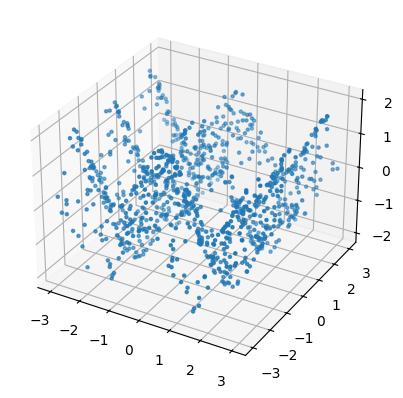

In [25]:
# plottiamo
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(x[:,0], x[:,1], y, marker=".");
#ax.plot(x[:,0], x[:,1], y)

In [55]:
model = Sequential()
model.add(Input(x.shape[1:]))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer=Adam(learning_rate=0.02), loss="mse")

In [58]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1451   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8841 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9440 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9171 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8693 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8160 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8287 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7224 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6916 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6347 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6448 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6948 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6232 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5690 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

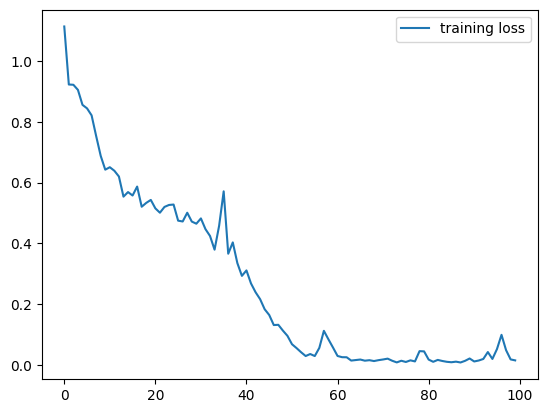

In [59]:
plt.plot(history.history["loss"], label="training loss")
plt.legend()

(50, 50) (50, 50) (50,)
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


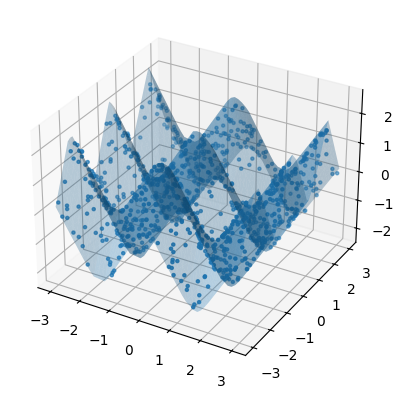

In [79]:
# Prediciamo dei dati e creiamo un plot 3d
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(x[:,0], x[:,1], y, marker=".")

line = np.linspace(-3, 3, 50)
# Creiamo una meshgrid, una griglia dove applichiamo una line ad ogni punto della line. E' un cross product (prodotto vettoriale).
# La meshgrid ci da le coordinate x e y di tutti i punti della griglia, motivo per il quale avremo 50x50 coordinate x e 50x50 coordinate y
xx, yy = np.meshgrid(line, line)
# plt.plot(xx, yy) -> restituisce tutti i pallini del plot
print(xx.shape, yy.shape, line.shape)
# Siccome il modello si aspetta un array Nx2, li appiccichiamo. Prima però ne facciamo il flattening
x_grid = np.vstack((xx.flatten(), yy.flatten())).T # questo ci darà una dimensione 2x2500 se non trasponiamo
y_hat = model.predict(x_grid).flatten() # Se non flatteniamo, ci esce un 2500x1 di dimensione.
ax.plot_trisurf(x_grid[:,0], x_grid[:,1], y_hat, linewidth=0.2, antialiased=True, alpha=0.3)

(50, 50) (50, 50) (50,)
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


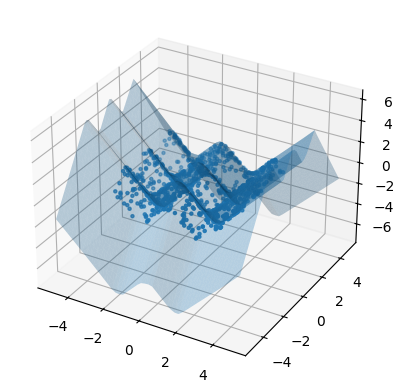

In [80]:
# Extrapolation
# Come mai una ANN non è buona a estrapolare? Siccome non si usano le funzioni periodiche nelle activation functions,
# non si può andare a costruire l'input
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(x[:,0], x[:,1], y, marker=".")

line = np.linspace(-5, 5, 50)
# Creiamo una meshgrid, una griglia dove applichiamo una line ad ogni punto della line. E' un cross product (prodotto vettoriale).
# La meshgrid ci da le coordinate x e y di tutti i punti della griglia, motivo per il quale avremo 50x50 coordinate x e 50x50 coordinate y
xx, yy = np.meshgrid(line, line)
# plt.plot(xx, yy) -> restituisce tutti i pallini del plot
print(xx.shape, yy.shape, line.shape)
# Siccome il modello si aspetta un array Nx2, li appiccichiamo. Prima però ne facciamo il flattening
x_grid = np.vstack((xx.flatten(), yy.flatten())).T # questo ci darà una dimensione 2x2500 se non trasponiamo
y_hat = model.predict(x_grid).flatten() # Se non flatteniamo, ci esce un 2500x1 di dimensione.
ax.plot_trisurf(x_grid[:,0], x_grid[:,1], y_hat, linewidth=0.2, antialiased=True, alpha=0.3)